Employee attrition and key factors(Part-1)
Data Preprocessing

In [3]:
import pandas as pd

Read the Dataset

In [5]:
df = pd.read_csv("C:\\Users\\HP\\Downloads\\HR_Analytics(303 project).csv")

In [1]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.svm import SVC

In [7]:
from sklearn.preprocessing import StandardScaler

Convert Catagorical Value to Numerical

In [8]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ensure all values are numeric (convert booleans to integers)
df_encoded = df_encoded.astype(int)

# Save the processed dataset to a new file
df_encoded.to_csv("fully_processed_dataset.csv", index=False)

# Print the first few rows of the encoded dataset
print(df_encoded.head())

   Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                    

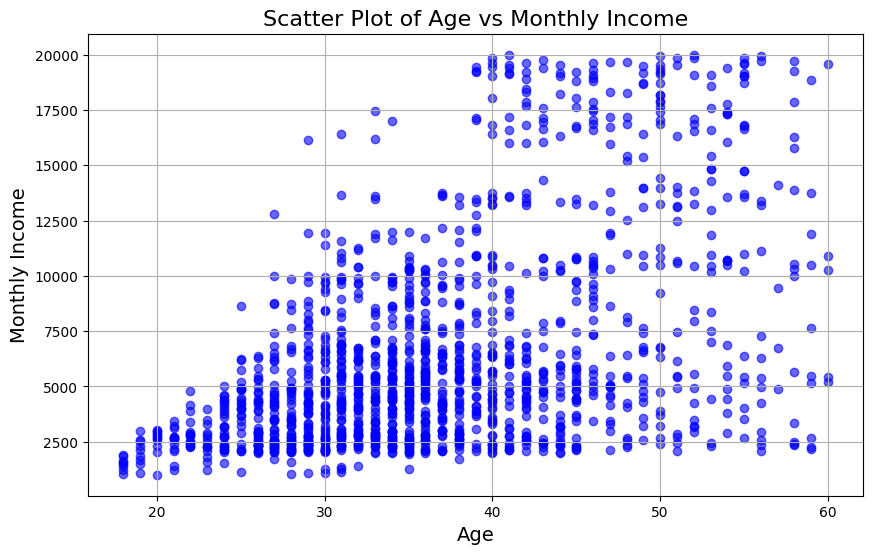

In [9]:
# Ensure all categorical data is converted to numerical values
df = pd.get_dummies(df)

# Scatter plot for two columns
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['MonthlyIncome'], alpha=0.6, color='blue')
plt.title('Scatter Plot of Age vs Monthly Income', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Monthly Income', fontsize=14)
plt.grid(True)
plt.show()

Logistic Model

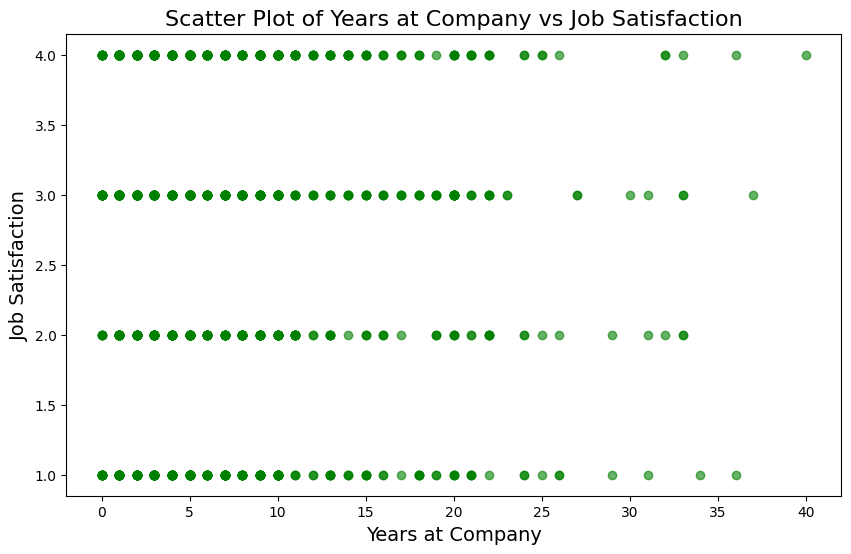

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(df['YearsAtCompany'], df['JobSatisfaction'], alpha=0.6, color='green')
plt.title('Scatter Plot of Years at Company vs Job Satisfaction', fontsize=16)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Job Satisfaction', fontsize=14)
plt.show()


Deviding Trainning and Testing Data

In [149]:
# Define the target column (Y) and the feature columns (X)
Y = df['JobSatisfaction']  # Replace 'SatisfactionLevel' with the correct column name for your target
X = df.drop(columns=['JobSatisfaction'])  # Drop the target column from the features

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting splits
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training target shape (Y_train):", Y_train.shape)
print("Testing target shape (Y_test):", Y_test.shape)

Training data shape (X_train): (1176, 34)
Testing data shape (X_test): (294, 34)
Training target shape (Y_train): (1176,)
Testing target shape (Y_test): (294,)


In [24]:
print(df.columns.tolist())


['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_No', 'Attrition_Yes', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Lab

In [25]:
df.columns = df.columns.str.strip()


In [33]:
df = pd.get_dummies(df, drop_first=True)  # Use drop_first=True to avoid multi-collinearity


In [34]:
df = pd.get_dummies(df, columns=[col for col in df.columns if col != 'Attrition'])


In [11]:
import numpy as np

In [ ]:
###akhiba
# from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.ensemble import RandomForestClassifier  # For classification

# Choose the appropriate model type
model = RandomForestRegressor(random_state=42)  # For regression
# model = RandomForestClassifier(random_state=42)  # For classification

# Train the model on the training data
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [12]:
from sklearn.decomposition import PCA

Plot on Testing and Trainning Data

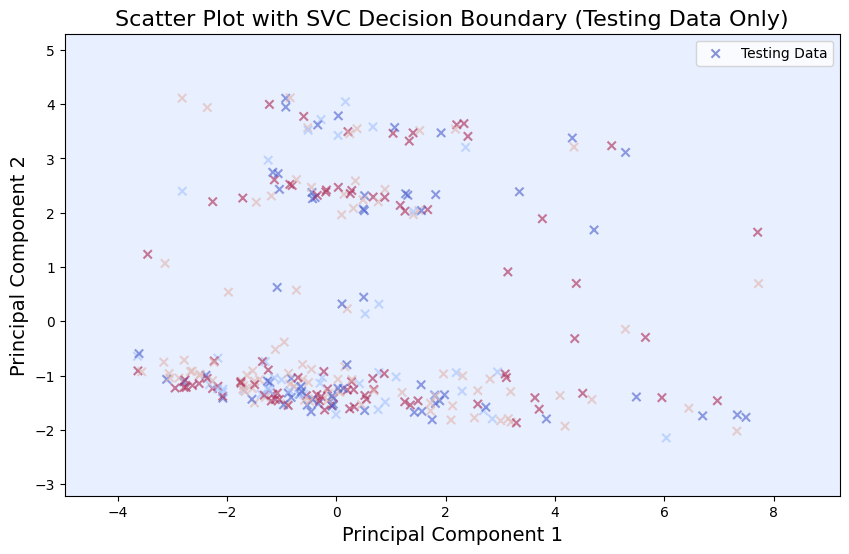

In [48]:
# Visualize the results with a scatter plot (only for testing data)
plt.figure(figsize=(10, 6))

# Scatter plot for testing data only
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap='coolwarm', label='Testing Data', marker='x', alpha=0.6)

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.title("Scatter Plot with SVC Decision Boundary (Testing Data Only)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()


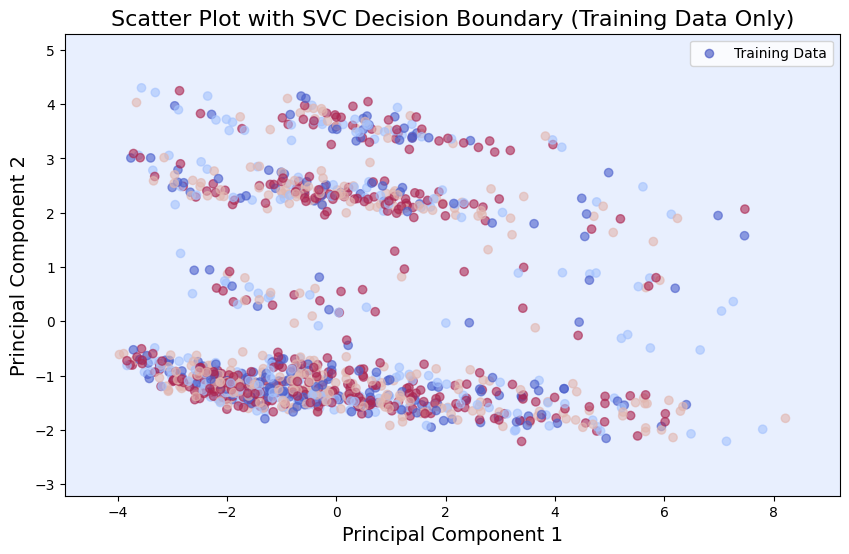

In [113]:
# Visualize the results with a scatter plot (for training data)
plt.figure(figsize=(10, 6))

# Scatter plot for training data only
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', label='Training Data', marker='o', alpha=0.6)

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.title("Scatter Plot with SVC Decision Boundary (Training Data Only)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()


Plot with SVC model

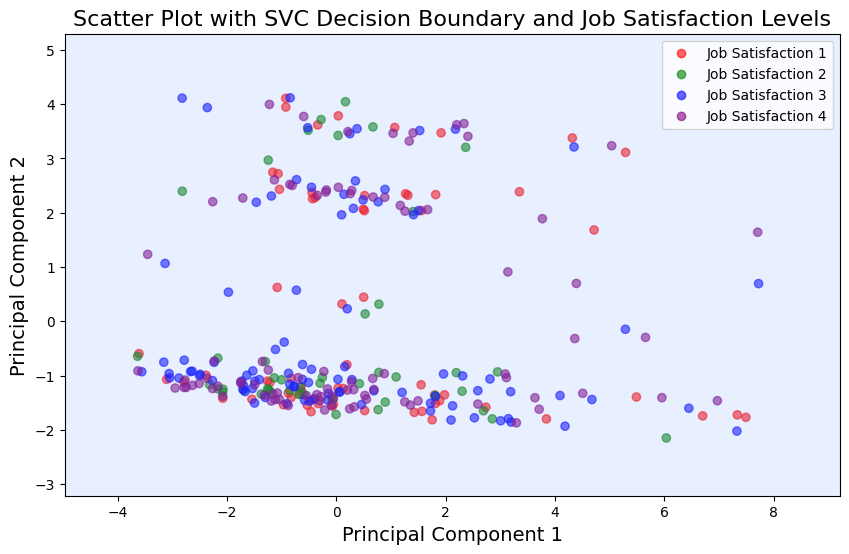

In [49]:
Y = df['JobSatisfaction']  # Target column is JobSatisfaction
X = df.drop(columns=['JobSatisfaction'])  # Drop target column for features

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to 2 features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train an SVC model
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_pca, Y_train)

# Create a scatter plot for testing data
plt.figure(figsize=(10, 6))

# Define color mapping for Job Satisfaction (1, 2, 3, 4)
colors = {1: 'red', 2: 'green', 3: 'blue', 4: 'purple'}

# Scatter plot for testing data, color-coded by Job Satisfaction levels
for satisfaction_level in [1, 2, 3, 4]:
    idx = Y_test == satisfaction_level
    plt.scatter(X_test_pca[idx, 0], X_test_pca[idx, 1], 
                c=[colors[satisfaction_level]]*len(X_test_pca[idx]), 
                label=f'Job Satisfaction {satisfaction_level}', alpha=0.6)

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.title("Scatter Plot with SVC Decision Boundary and Job Satisfaction Levels", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()

Correct and Incorrect to our prediction

C:\Users\HP\AppData\Local\Temp\ipykernel_2084\3268744970.py:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_test, cmap='coolwarm', label='Test Data (Predicted)', marker='x', edgecolor='k', alpha=0.8)


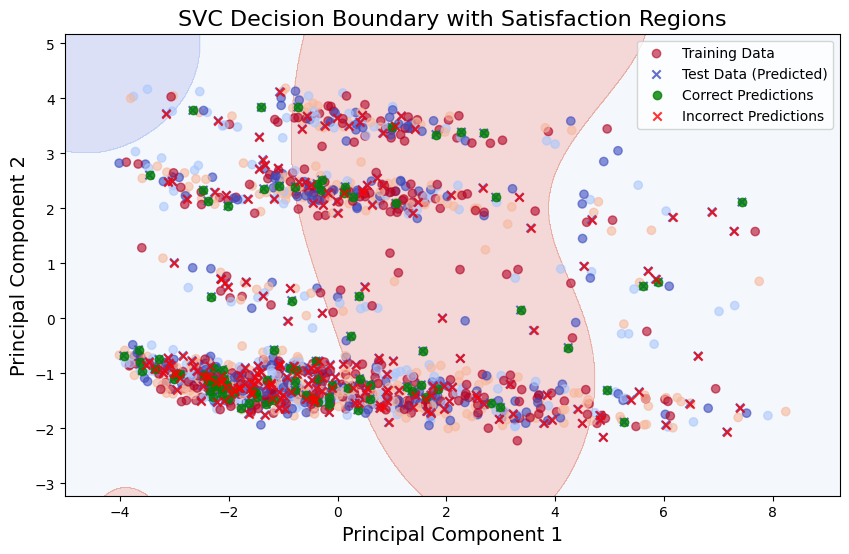

In [117]:
plt.figure(figsize=(10, 6))

# Decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', label='Training Data', marker='o', alpha=0.6)

# Test data by prediction
Y_pred_test = svc.predict(X_test_pca)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_test, cmap='coolwarm', label='Test Data (Predicted)', marker='x', edgecolor='k', alpha=0.8)

# Highlight correct and incorrect predictions
correct = (Y_pred_test == Y_test)
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', label='Correct Predictions', marker='o', alpha=0.8)
plt.scatter(X_test_pca[~correct, 0], X_test_pca[~correct, 1], c='red', label='Incorrect Predictions', marker='x', alpha=0.8)
# Labels and legend
plt.title("SVC Decision Boundary with Satisfaction Regions", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2084\4035421982.py:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap='coolwarm', label='Test Data', marker='x', edgecolor='k', alpha=0.8)


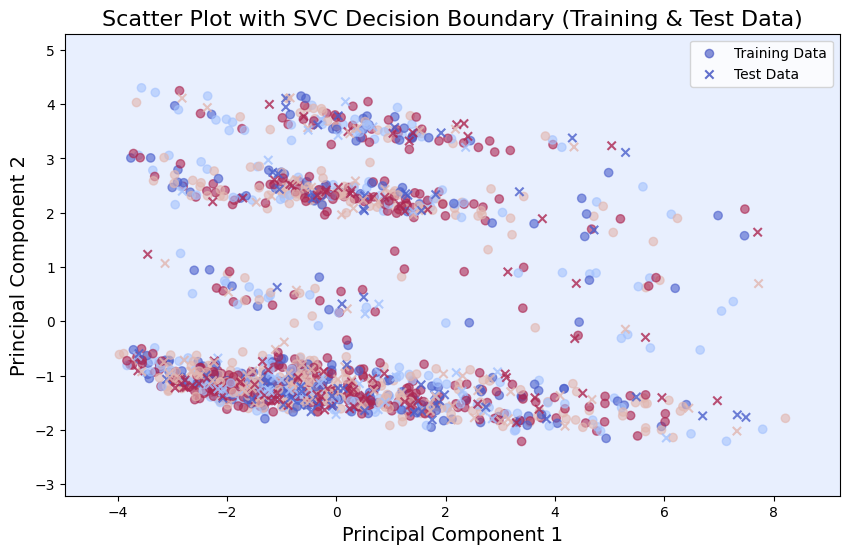

In [114]:
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', label='Training Data', marker='o', alpha=0.6)

# Scatter plot for test data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap='coolwarm', label='Test Data', marker='x', edgecolor='k', alpha=0.8)

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Title and labels
plt.title("Scatter Plot with SVC Decision Boundary (Training & Test Data)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()

Prediction our Data 

In [ ]:
# Predict satisfaction levels for the test data
Y_pred_test =     svc.predict(X_test_pca)
# Map numerical labels to satisfaction levels
satisfaction_mapping = {1: "Low", 2: "Medium", 3: "High", 4: "Best"}  

# Map the predicted labels to satisfaction levels
satisfaction_levels = [satisfaction_mapping[label] for label in Y_pred_test]

# Combine test data with predicted satisfaction levels
test_results = list(zip(X_test_pca, satisfaction_levels))

# Print the results
for point, level in test_results:
    print(f"Point: {point}, Satisfaction Level: {level}")

Point: [-0.59926513 -0.00660792], Satisfaction Level: Best
Point: [0.97333737 0.16845628], Satisfaction Level: High
Point: [-2.30177082 -1.89643428], Satisfaction Level: Low
Point: [1.22307728 0.18211249], Satisfaction Level: High
Point: [-0.34922299 -0.70992228], Satisfaction Level: Best
Point: [-0.74951946 -0.5974937 ], Satisfaction Level: Best
Point: [-0.78836347 -1.76722957], Satisfaction Level: Medium
Point: [-0.00899023  1.05554692], Satisfaction Level: High
Point: [ 1.17132138 -1.54693999], Satisfaction Level: Low
Point: [-1.28713651 -0.63745065], Satisfaction Level: Low
Point: [ 0.52722184 -0.87435901], Satisfaction Level: Best
Point: [ 1.36215597 -1.54049606], Satisfaction Level: Low
Point: [ 0.57670528 -1.01611058], Satisfaction Level: Best
Point: [0.13729921 0.41201267], Satisfaction Level: High
Point: [-1.97936101 -0.87925919], Satisfaction Level: Low
Point: [-0.73293308 -0.54842024], Satisfaction Level: Best
Point: [-0.47321189  0.10057762], Satisfaction Level: Best
Point:

In [129]:
from sklearn.svm import SVC
svc = SVC(class_weight='balanced')  
svc.fit(X_train_pca, Y_train)

SVC(class_weight='balanced')

RBF kernel Model

Training Accuracy: 0.336734693877551
Testing Accuracy: 0.2755102040816326

Classification Report (Testing):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        56
           3       0.27      0.59      0.37        88
           4       0.28      0.32      0.30        92

    accuracy                           0.28       294
   macro avg       0.14      0.23      0.17       294
weighted avg       0.17      0.28      0.21       294



c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

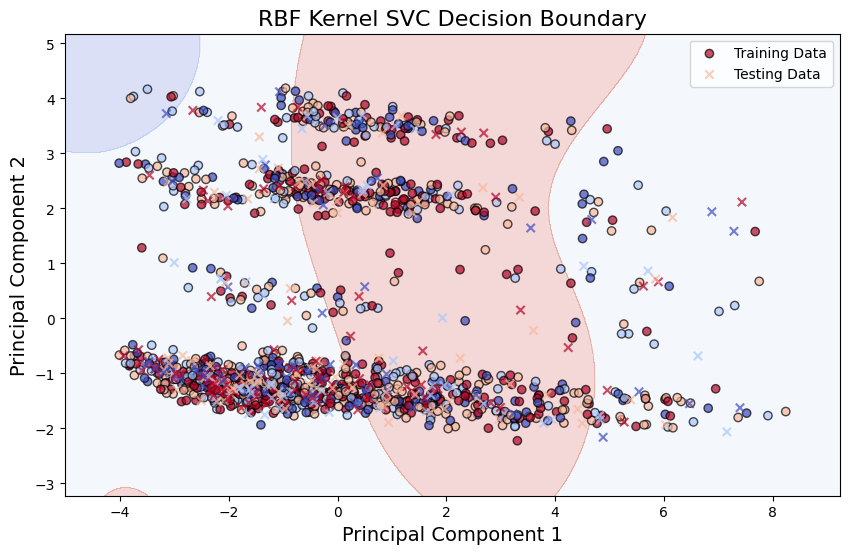

In [ ]:
#bvf modellll
# Step 1: Prepare features and target
features = df.drop(columns=['JobSatisfaction'])  # Replace 'JobSatisfaction' with your target column name
target = df['JobSatisfaction']

# Step 2: Split the data
X_train, X_test, Y_train, Y_test = train_test_split(
    features, target, test_size=0.2, random_state=42, stratify=target
)

# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply PCA (optional for dimensionality reduction)
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Train the SVC model with RBF kernel
svc_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_rbf.fit(X_train_pca, Y_train)

# Step 6: Predictions
train_predictions = svc_rbf.predict(X_train_pca)
test_predictions = svc_rbf.predict(X_test_pca)

# Step 7: Evaluate the model
print("Training Accuracy:", accuracy_score(Y_train, train_predictions))
print("Testing Accuracy:", accuracy_score(Y_test, test_predictions))
print("\nClassification Report (Testing):")
print(classification_report(Y_test, test_predictions))

# Step 8: Visualize the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', label='Training Data', edgecolor='k', alpha=0.7)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap='coolwarm', marker='x', label='Testing Data', edgecolor='k', alpha=0.7)
plt.title("RBF Kernel SVC Decision Boundary", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()

In [119]:
from sklearn.svm import LinearSVC

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
from sklearn.preprocessing import StandardScaler

In [123]:
from sklearn.metrics import classification_report, accuracy_score

In [122]:
from sklearn.decomposition import PCA

In [125]:

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'HourlyRate', 
            'JobInvolvement', 'JobLevel', 'EnvironmentSatisfaction']
target = 'JobSatisfaction'

X = df[features]
Y = df[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA (if needed, here reducing to 2 components)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train LinearSVC with L1 regularization
svc_l1 = LinearSVC(penalty='l1', dual=False, C=1.0, random_state=42)  # 'dual=False' is required for L1
svc_l1.fit(X_train_pca, Y_train)

# Train LinearSVC with L2 regularization
svc_l2 = LinearSVC(penalty='l2', dual=True, C=1.0, random_state=42)
svc_l2.fit(X_train_pca, Y_train)

# Make predictions
Y_pred_l1 = svc_l1.predict(X_test_pca)
Y_pred_l2 = svc_l2.predict(X_test_pca)

# Evaluate the models
print("L1 Regularization Results:")
print(classification_report(Y_test, Y_pred_l1))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_l1)}")

print("\nL2 Regularization Results:")
print(classification_report(Y_test, Y_pred_l2))
print(f"Accuracy: {accuracy_score(Y_test, Y_pred_l2)}")


L1 Regularization Results:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        45
           3       0.21      0.19      0.20        94
           4       0.31      0.73      0.44        89

    accuracy                           0.28       294
   macro avg       0.13      0.23      0.16       294
weighted avg       0.16      0.28      0.20       294

Accuracy: 0.282312925170068

L2 Regularization Results:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        66
           2       0.00      0.00      0.00        45
           3       0.22      0.20      0.21        94
           4       0.31      0.72      0.43        89

    accuracy                           0.28       294
   macro avg       0.13      0.23      0.16       294
weighted avg       0.16      0.28      0.20       294

Accuracy: 0.282312925170068


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Us

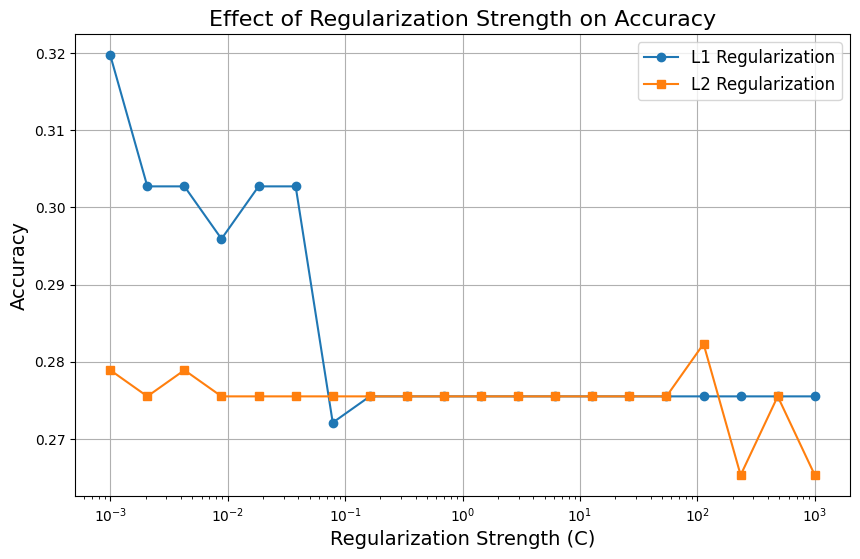

In [126]:
# Ensure the dataset has the required structure
features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 
            'HourlyRate', 'JobInvolvement', 'JobLevel', 'EnvironmentSatisfaction']
target = 'JobSatisfaction'

# Split the dataset into features (X) and target (Y)
X = df[features]
Y = df[target]

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of regularization strengths to test
C_values = np.logspace(-3, 3, 20)

# Initialize lists to store accuracies
l1_accuracies = []
l2_accuracies = []

# Iterate over C values
for C in C_values:
    # L1 Regularization
    svc_l1 = LinearSVC(penalty='l1', dual=False, C=C, max_iter=10000, random_state=42)
    svc_l1.fit(X_train_scaled, Y_train)
    Y_pred_l1 = svc_l1.predict(X_test_scaled)
    l1_accuracies.append(accuracy_score(Y_test, Y_pred_l1))

    # L2 Regularization
    svc_l2 = LinearSVC(penalty='l2', dual=True, C=C, max_iter=10000, random_state=42)
    svc_l2.fit(X_train_scaled, Y_train)
    Y_pred_l2 = svc_l2.predict(X_test_scaled)
    l2_accuracies.append(accuracy_score(Y_test, Y_pred_l2))

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, l1_accuracies, label="L1 Regularization", marker='o')
plt.plot(C_values, l2_accuracies, label="L2 Regularization", marker='s')
plt.xscale('log')
plt.title("Effect of Regularization Strength on Accuracy", fontsize=16)
plt.xlabel("Regularization Strength (C)", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


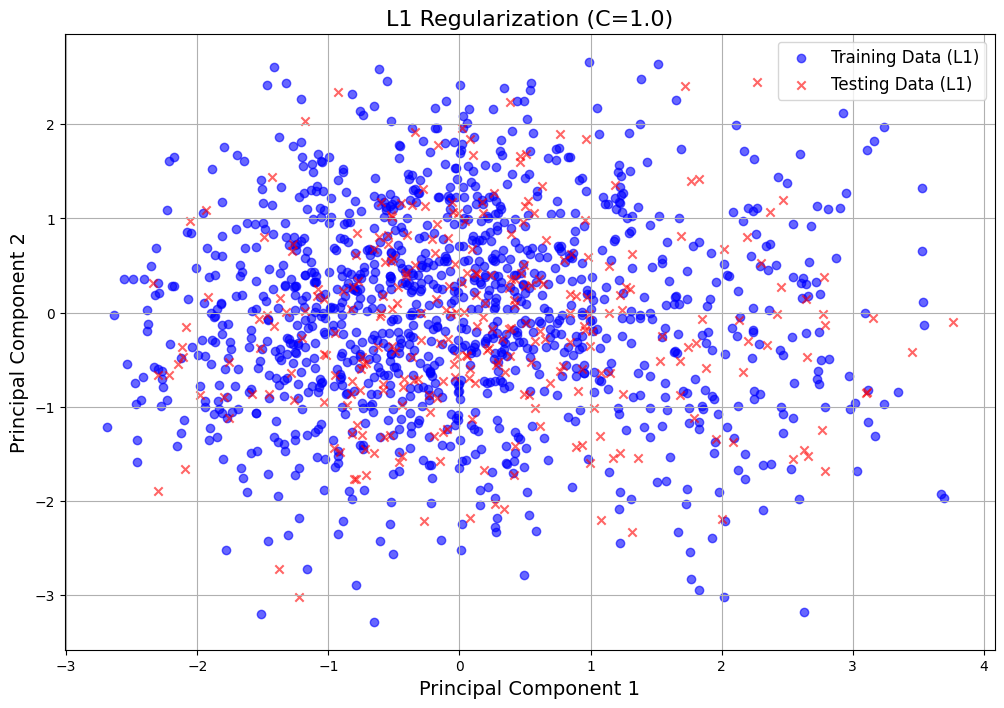

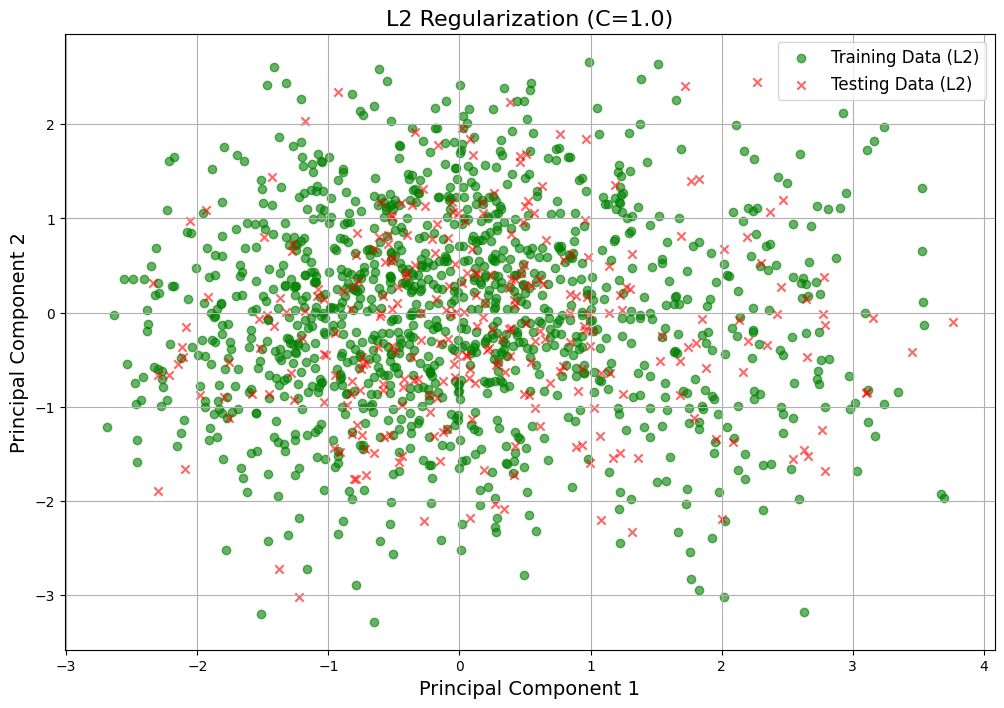

In [134]:
# Select a specific C value for visualization
C_to_visualize = 1.0  # Adjust this value to visualize different C strengths

# Train models with the selected C value
svc_l1 = LinearSVC(penalty='l1', dual=False, C=C_to_visualize, max_iter=10000, random_state=42)
svc_l1.fit(X_train_scaled, Y_train)

svc_l2 = LinearSVC(penalty='l2', dual=True, C=C_to_visualize, max_iter=10000, random_state=42)
svc_l2.fit(X_train_scaled, Y_train)

# Transform data using PCA
train_pca_l1 = pca.transform(X_train_scaled)
test_pca_l1 = pca.transform(X_test_scaled)

train_pca_l2 = pca.transform(X_train_scaled)
test_pca_l2 = pca.transform(X_test_scaled)

# Plot L1 Regularization
plt.figure(figsize=(12, 8))
plt.scatter(train_pca_l1[:, 0], train_pca_l1[:, 1], color='blue', label='Training Data (L1)', marker='o', alpha=0.6)
plt.scatter(test_pca_l1[:, 0], test_pca_l1[:, 1], color='red', label='Testing Data (L1)', marker='x', alpha=0.6)
plt.title(f"L1 Regularization (C={C_to_visualize})", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot L2 Regularization
plt.figure(figsize=(12, 8))
plt.scatter(train_pca_l2[:, 0], train_pca_l2[:, 1], color='green', label='Training Data (L2)', marker='o', alpha=0.6)
plt.scatter(test_pca_l2[:, 0], test_pca_l2[:, 1], color='red', label='Testing Data (L2)', marker='x', alpha=0.6)
plt.title(f"L2 Regularization (C={C_to_visualize})", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()



Randomly predicted new Data

In [142]:
# Example new data
new_data = pd.DataFrame({
    'Age': [29],
    'DailyRate': [1100],
    'DistanceFromHome': [5],
    'Education': [3],
    'EmployeeCount': [1],
    'HourlyRate': [30],
    'JobInvolvement': [3],
    'JobLevel': [2],
    'EnvironmentSatisfaction': [4]
})

# Step 1: Scale the new data
new_data_scaled = scaler.transform(new_data)

# Step 2: Apply PCA transformation
new_data_pca = pca.transform(new_data_scaled)

# Step 3: Predict using the trained model
new_pred = svc.predict(new_data_pca)

# Step 4: Map prediction to satisfaction level
satisfaction_mapping = {1: "Low", 2: "Medium", 3: "High", 4: "Best"}
predicted_satisfaction = satisfaction_mapping[new_pred[0]]

print(f"Predicted Satisfaction Level: {predicted_satisfaction}")


Predicted Satisfaction Level: Medium


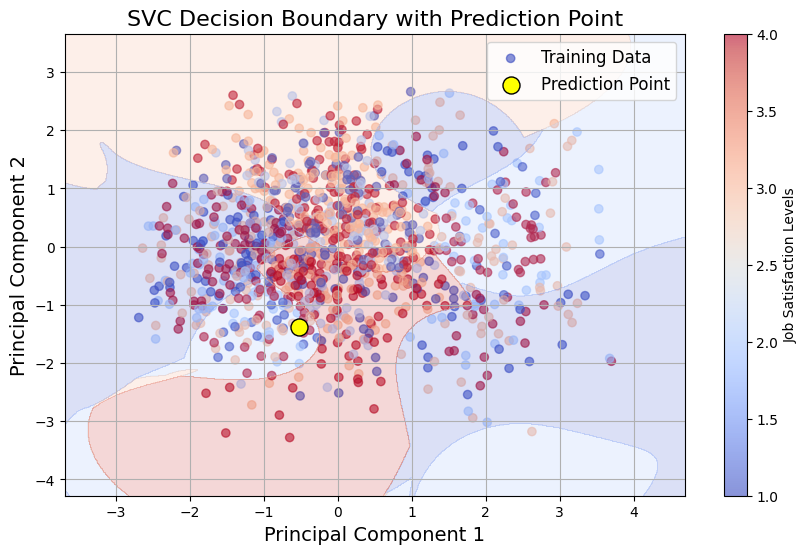

In [143]:
# Visualize the training data and SVC decision boundary
plt.figure(figsize=(10, 6))

# Scatter plot for the training data
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', alpha=0.6, label="Training Data")

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Plot the new prediction point
plt.scatter(new_data_pca[0, 0], new_data_pca[0, 1], color='yellow', edgecolor='black', s=150, label="Prediction Point")

# Add title, labels, and legend
plt.title("SVC Decision Boundary with Prediction Point", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend(fontsize=12)
plt.colorbar(scatter, label="Job Satisfaction Levels")
plt.grid(True)
plt.show()


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
import joblib
joblib.dump(svc, 'trained_model.pkl')  # Save the trained SVC model
  # Load the previously saved model

NameError: name 'svc' is not defined

In [74]:
import os
print(os.getcwd()) 

d:\


In [77]:
model = joblib.load("D:\\trained_model.pkl")


In [78]:
new_data = pd.read_csv("C:\\Users\\HP\\Downloads\\HR_Analytics(303 project).csv")

In [93]:
print(new_data.columns)


Index(['Age'], dtype='object')


In [94]:

features = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'EnvironmentSatisfaction']  # Update to correct feature names


In [98]:
# Fit PCA on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)


In [15]:
import joblib
joblib.dump(pca, 'pca_model.pkl')  # Save the PCA model


NameError: name 'pca' is not defined

In [100]:
pca = joblib.load('pca_model.pkl')  # Load the PCA model


In [108]:
import joblib
import pandas as pd

In [ ]:
# Fit the scaler on the training data
scaler = StandardScaler()
scaler.fit(X_train)  # Fit on the training data



StandardScaler()

In [59]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
# Define the target column (Y) and feature columns (X)
Y = df['JobSatisfaction']  # Replace 'JobSatisfaction' with your target column
X = df.drop(columns=['JobSatisfaction'])  # Drop the target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to 2 features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train an SVC model
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_pca, Y_train)

# Visualize the results with a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', label='Training Data', alpha=0.6)

# Scatter plot for testing data
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_test, cmap='coolwarm', label='Testing Data', marker='x')

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.title("Scatter Plot with SVC Decision Boundary (PCA Reduced)", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()

NameError: name 'train_test_split' is not defined

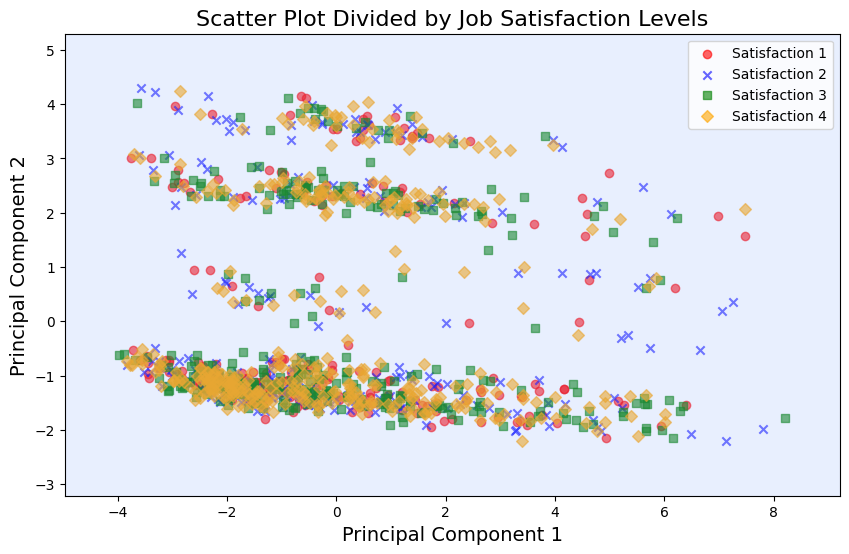

In [44]:
# Ensure all categorical data is converted to numerical values
df = pd.get_dummies(df)

# Define the target column (Y) and feature columns (X)
Y = df['JobSatisfaction']  # Replace 'JobSatisfaction' with your target column
X = df.drop(columns=['JobSatisfaction'])  # Drop the target column

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scale the features for SVC
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce to 2 features
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train an SVC model
svc = SVC(kernel='linear', random_state=42)
svc.fit(X_train_pca, Y_train)

# Visualize the results with a scatter plot, divided by job satisfaction levels
plt.figure(figsize=(10, 6))

# Plot each job satisfaction level with a different marker or color
satisfaction_levels = sorted(Y_train.unique())
colors = ['red', 'blue', 'green', 'orange', 'purple']  # Colors for each level
markers = ['o', 'x', 's', 'D', '^']  # Markers for each level

for level, color, marker in zip(satisfaction_levels, colors, markers):
    idx = Y_train == level
    plt.scatter(
        X_train_pca[idx, 0], X_train_pca[idx, 1], 
        color=color, marker=marker, alpha=0.6, label=f'Satisfaction {level}'
    )

# Plot the decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.title("Scatter Plot Divided by Job Satisfaction Levels", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()


In [46]:
from sklearn.impute import SimpleImputer

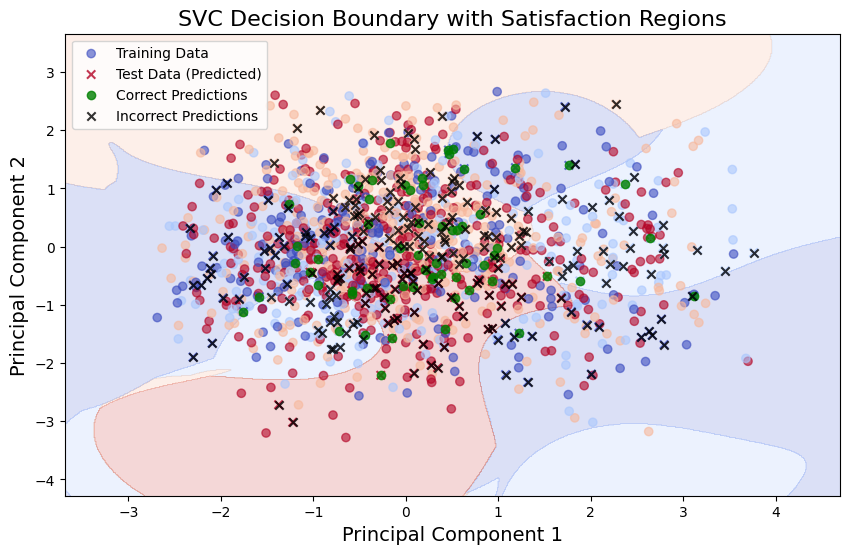

In [157]:


plt.figure(figsize=(10, 6))

# Decision boundary
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='coolwarm', label='Training Data', marker='o', alpha=0.6)

# Test data by prediction
Y_pred_test = svc.predict(X_test_pca)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=Y_pred_test, cmap='coolwarm', label='Test Data (Predicted)', marker='x', alpha=0.8)

# Highlight correct and incorrect predictions
correct = (Y_pred_test == Y_test)
plt.scatter(X_test_pca[correct, 0], X_test_pca[correct, 1], c='green', label='Correct Predictions', marker='o', alpha=0.8)
plt.scatter(X_test_pca[~correct, 0], X_test_pca[~correct, 1], c='black', label='Incorrect Predictions', marker='x', alpha=0.8)

# Labels and legend
plt.title("SVC Decision Boundary with Satisfaction Regions", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.legend()
plt.show()


Accuracy: 0.21
Precision (Weighted): 0.21
Recall (Weighted): 0.21
F1-Score (Weighted): 0.21

Classification Report:
              precision    recall  f1-score   support

         Low       0.19      0.20      0.20        66
      Medium       0.12      0.13      0.13        45
        High       0.23      0.24      0.24        94
        Best       0.26      0.22      0.24        89

    accuracy                           0.21       294
   macro avg       0.20      0.20      0.20       294
weighted avg       0.21      0.21      0.21       294


Confusion Matrix:
[[13  9 30 14]
 [ 8  6 18 13]
 [20 21 23 30]
 [26 13 30 20]]


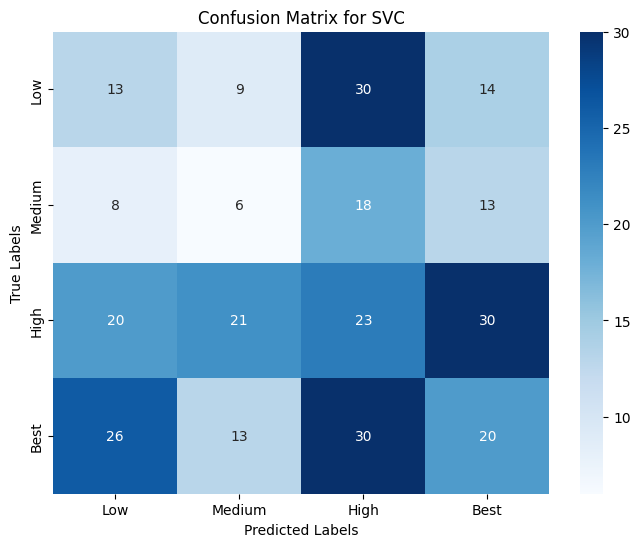

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Example: Predictions for SVC on the testing data
svc_pred = svc.predict(X_test_pca)  # Replace `svc` with your trained model

# 1. Accuracy
accuracy = accuracy_score(Y_test, svc_pred)
print(f"Accuracy: {accuracy:.2f}")

# 2. Precision, Recall, and F1-Score (Macro, Micro, and Weighted Average)
precision = precision_score(Y_test, svc_pred, average='weighted')
recall = recall_score(Y_test, svc_pred, average='weighted')
f1 = f1_score(Y_test, svc_pred, average='weighted')
print(f"Precision (Weighted): {precision:.2f}")
print(f"Recall (Weighted): {recall:.2f}")
print(f"F1-Score (Weighted): {f1:.2f}")

# 3. Detailed Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, svc_pred, target_names=["Low", "Medium", "High", "Best"]))

# 4. Confusion Matrix
print("\nConfusion Matrix:")
cf_matrix = confusion_matrix(Y_test, svc_pred)
print(cf_matrix)

# 5. Visualize the Confusion Matrix (Optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Low", "Medium", "High", "Best"], yticklabels=["Low", "Medium", "High", "Best"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVC')
plt.show()


  Classes       SVC
0     Low  0.195489
1  Medium  0.127660
2    High  0.235897
3    Best  0.240964


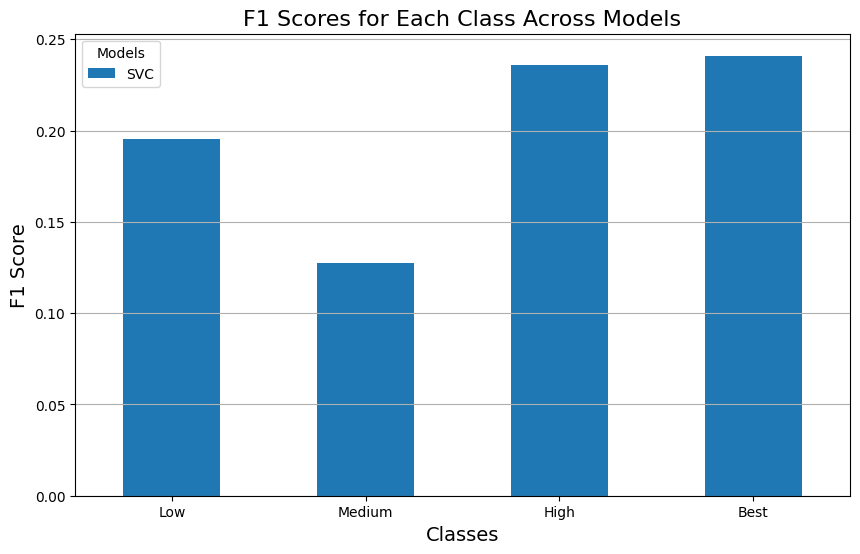

In [161]:
from sklearn.metrics import f1_score

# Replace these predictions with those from your models
svc_pred = svc.predict(X_test_pca)  # Example for SVC
# rbf_pred = rbf_model.predict(X_test_scaled)  # Replace with RBF model predictions
# l1_pred = svc_l1.predict(X_test_scaled)  # Replace with L1 model predictions
# l2_pred = svc_l2.predict(X_test_scaled)  # Replace with L2 model predictions

# Compute F1 scores for each class for SVC
f1_svc = f1_score(Y_test, svc_pred, average=None)

# (Repeat for other models and store their F1 scores as lists)
# f1_rbf = f1_score(Y_test, rbf_pred, average=None)
# f1_l1 = f1_score(Y_test, l1_pred, average=None)
# f1_l2 = f1_score(Y_test, l2_pred, average=None)

# Combine the results into a matrix for easy comparison
f1_matrix = {
    "Classes": ["Low", "Medium", "High", "Best"],  # Replace with your class labels
    "SVC": f1_svc,
    # "RBF": f1_rbf,
    # "L1": f1_l1,
    # "L2": f1_l2
}

# Convert to DataFrame for a neat tabular display
import pandas as pd
f1_df = pd.DataFrame(f1_matrix)
print(f1_df)

# Optional: Plot F1 scores
f1_df.set_index("Classes").plot(kind="bar", figsize=(10, 6))
plt.title("F1 Scores for Each Class Across Models", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Models")
plt.grid(axis='y')
plt.show()


In [163]:
from sklearn.metrics import precision_score

In [165]:
from sklearn.svm import SVC, LinearSVC

In [166]:
from sklearn.ensemble import RandomForestClassifier

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Precision Matrix:
              SVC       RBC  L1 Regularization  L2 Regularization
Classes                                                          
Low      0.166667  0.166667           0.000000           0.000000
Medium   0.250000  0.206897           0.000000           0.000000
High     0.290698  0.273585           0.262712           0.264957
Best     0.283505  0.243902           0.284091           0.282486


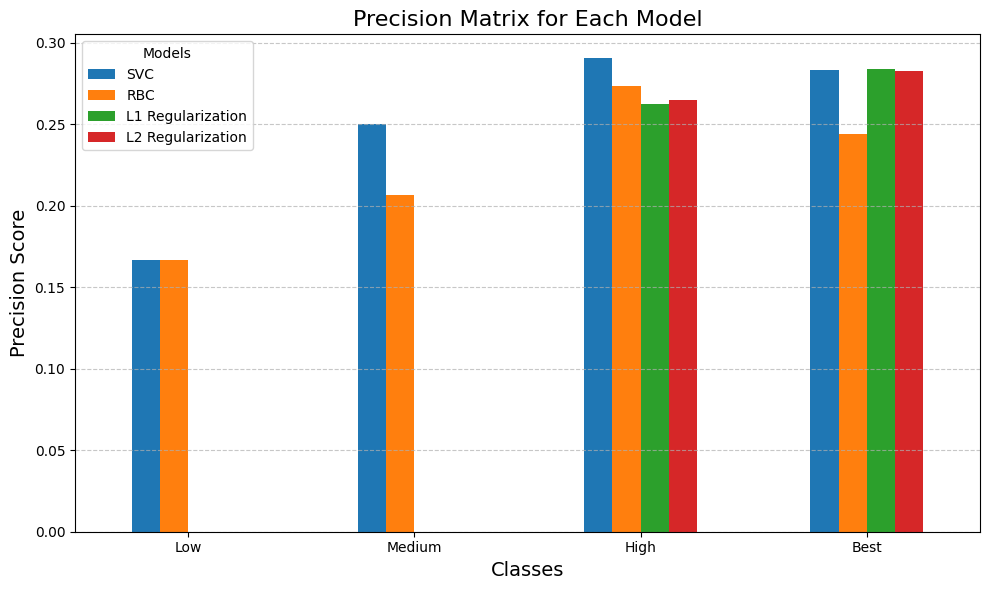

In [167]:
# Define your models
svc = SVC(random_state=42)
rbc = RandomForestClassifier(random_state=42)
svc_l1 = LinearSVC(penalty='l1', dual=False, max_iter=10000, random_state=42)
svc_l2 = LinearSVC(penalty='l2', dual=True, max_iter=10000, random_state=42)

# Define a dictionary of models
models = {
    'SVC': svc,
    'RBC': rbc,
    'L1 Regularization': svc_l1,
    'L2 Regularization': svc_l2
}

# Train the models on the training data
for model_name, model in models.items():
    model.fit(X_train_scaled, Y_train)

# Initialize an empty dictionary to store precision scores
precision_matrix = {}

# Iterate through each model and calculate precision for each class
for model_name, model in models.items():
    # Predict using the test data
    Y_pred = model.predict(X_test_scaled)
    
    # Calculate precision score for each class
    precision = precision_score(Y_test, Y_pred, average=None)
    
    # Add to the matrix
    precision_matrix[model_name] = precision

# Display the precision matrix
precision_df = pd.DataFrame(precision_matrix, index=["Low", "Medium", "High", "Best"])
precision_df.index.name = "Classes"

print("\nPrecision Matrix:")
print(precision_df)

# Plot the Precision Matrix
precision_df.plot(kind="bar", figsize=(10, 6))
plt.title("Precision Matrix for Each Model", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Precision Score", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Models")
plt.tight_layout()
plt.show()



Recall Matrix:
              SVC       RBC  L1 Regularization  L2 Regularization
Classes                                                          
Low      0.015152  0.090909           0.000000           0.000000
Medium   0.044444  0.133333           0.000000           0.000000
High     0.265957  0.308511           0.329787           0.329787
Best     0.617978  0.337079           0.561798           0.561798


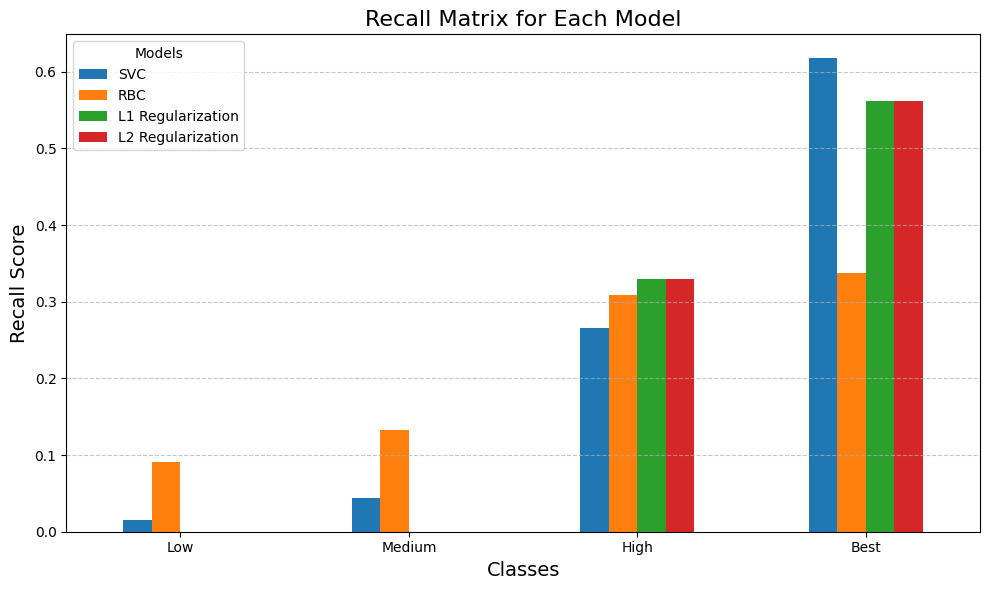

In [168]:
# Initialize an empty dictionary to store recall scores
recall_matrix = {}

# Iterate through each model and calculate recall for each class
for model_name, model in models.items():
    # Predict using the test data
    Y_pred = model.predict(X_test_scaled)
    
    # Calculate recall score for each class
    recall = recall_score(Y_test, Y_pred, average=None)
    
    # Add to the matrix
    recall_matrix[model_name] = recall

# Display the recall matrix
recall_df = pd.DataFrame(recall_matrix, index=["Low", "Medium", "High", "Best"])
recall_df.index.name = "Classes"

print("\nRecall Matrix:")
print(recall_df)

# Plot the Recall Matrix
recall_df.plot(kind="bar", figsize=(10, 6))
plt.title("Recall Matrix for Each Model", fontsize=16)
plt.xlabel("Classes", fontsize=14)
plt.ylabel("Recall Score", fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Models")
plt.tight_layout()
plt.show()
